In [282]:
using Plots
include("utils.jl");

$$\Psi(x)=e^{-\lambda x^2+bx}\sum_{\{h\}}e^{(c+xW)h}=e^{-\lambda x^2+bx}\prod_{j}^{N_h}(1+e^{c+xW})$$

In [283]:
"""Constants in the test"""

λ = 0.5
b = 0.
N_h = 2
c = Complex.(zeros(N_h))
# w = [(0. +1im),(0. +1im)]

2-element Vector{ComplexF64}:
 0.0 + 0.0im
 0.0 + 0.0im

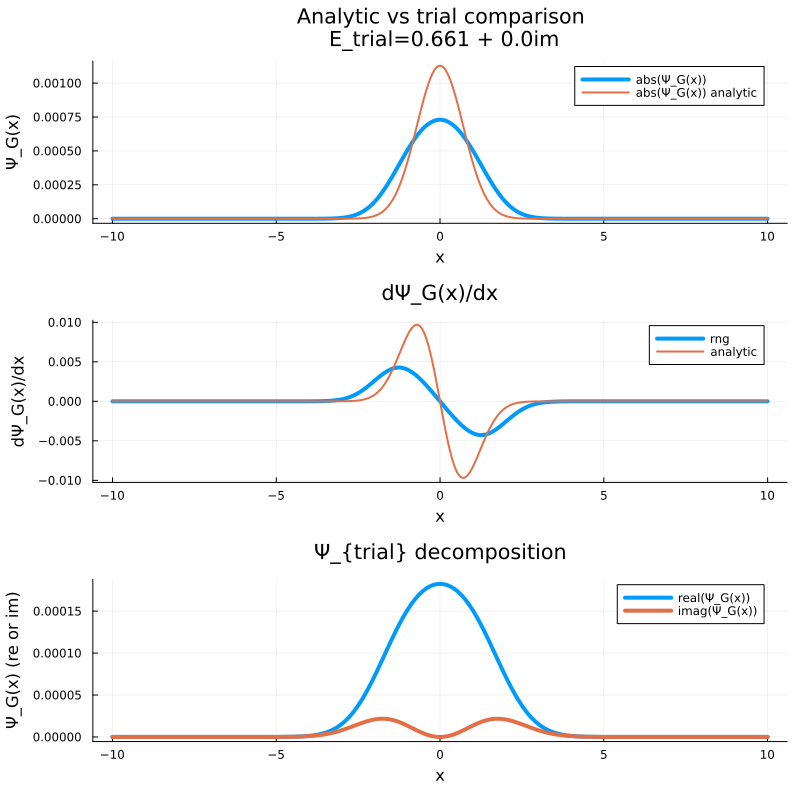

In [287]:
# generate symetric random w such that w_j~N(0,1)

half_w = Complex.(randn(Int32(N_h//2)), randn(Int32(N_h//2)))
w = Complex.(vcat(half_w, -half_w));

# range of the domain
xmin = -10
xmax = 10
n = 10000
x = range(xmin, stop = xmax, length = n)

# compute the trial wf
y = Complex.(ones(n))
for i = 1:n
    y[i] = Ψ_G(x[i], λ, b, c, w)
end

# compute the trial wf energy
E = round(energy(λ, b, c, w,xmin, xmax, n ), digits=3)


# use the same methods to compute the exact ground state wf λ=0.5, b=0, c=0, w=0
y_analytic = Complex.(ones(n))
for i = 1:n
    y_analytic[i] = Ψ_G(x[i], 0.5, 0., 0., 0.)
end

# compute the exact ground state wf energy
E_a = round(energy(0.5, 0., 0., 0.), digits=3)

# Calculate the probability of the trial wf and the exact wf
prob = abs.(y).^2/sum(abs.(y).^2)
analytic_prob = abs.(y_analytic).^2/sum(abs.(y_analytic).^2)

p1 = plot()

# title = "Ψ_G(x) for \n b = $b, \nc=$c, \nw=$w"

plot!(x, prob, label = "abs(Ψ_G(x))", xlabel = "x", ylabel = "Ψ_G(x)", title = "Analytic vs trial comparison\n E_trial=$E", lw = 4)
plot!(x, analytic_prob, label = "abs(Ψ_G(x)) analytic", lw = 2)

p2 = plot()

plot!(x[1:end-1],df(prob), label = "rng", lw = 4, title="dΨ_G(x)/dx", ylabel="dΨ_G(x)/dx", xlabel="x")
plot!(x[1:end-1],df(analytic_prob), label = "analytic", lw = 2)

p3 = plot()

plot!(x, real.(y)./sum(abs.(y).^2), label = "real(Ψ_G(x))", lw = 4, xlabel="x", ylabel="Ψ_G(x) (re or im)", title="Ψ_{trial} decomposition")
# plot!(x, real.(y_analytic)./sum(abs.(y_analytic).^2), label = "real(Ψ_G(x)) analytic", lw = 2)
plot!(x, imag.(y)./sum(abs.(y).^2), label = "imag(Ψ_G(x))", lw = 4)

plot(p1, p2, p3, layout = (3,1), size = (800, 800))



If we want the wf to be symmetric, $N_h$ must be even. On top of that, $W$ must have $N_h$ degrees of freedom. The others are fixed such that $W_{j+N_h}=-W_j\ j=1,2,...,N_h/2$

In [125]:
energy(λ, b, c, w)

13.787093239843962 + 0.0im

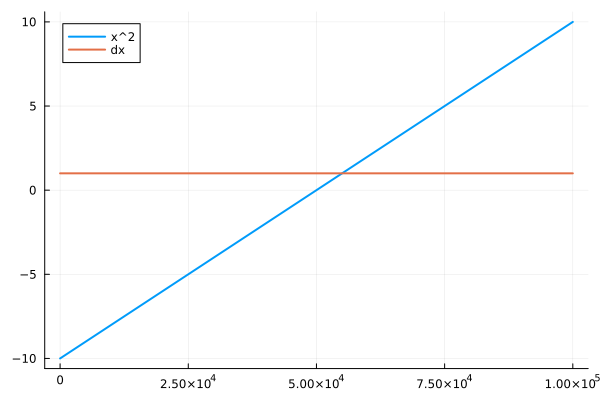

In [70]:
x_test = range(-10, stop = 10, length = 100000)
y_test = x_test
plot(y_test, label = "x^2", lw = 2)
plot!(df(y_test), label = "dx", lw = 2)